In [1]:
from sklearn.metrics import mean_squared_error


Current working directory: c:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting
Files in current directory: ['.git', '.venv', '.venv310', 'app', 'cleaned_aapl_data.csv', 'data', 'README.md', 'requirements.txt', 'Step1_EDA_Load_Data.ipynb', 'Step2_Check_Stationarity.ipynb', 'Step3_ARIMA_Model.ipynb', 'Step4_Prophet_Model.ipynb', 'stock_forecast_app.py', '__pycache__']
Using original Close price data.
Training data size: 8000
Test data size: 2000


<Figure size 1200x500 with 0 Axes>

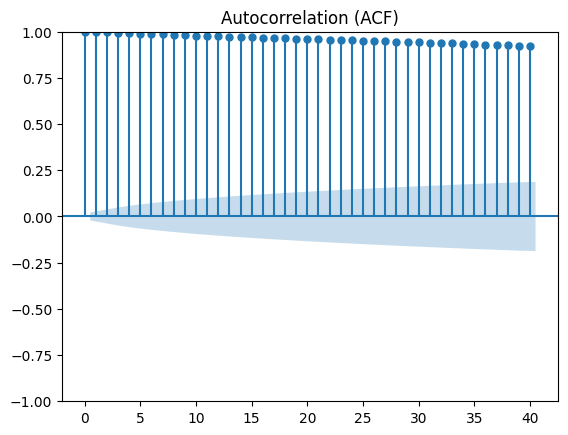

<Figure size 1200x500 with 0 Axes>

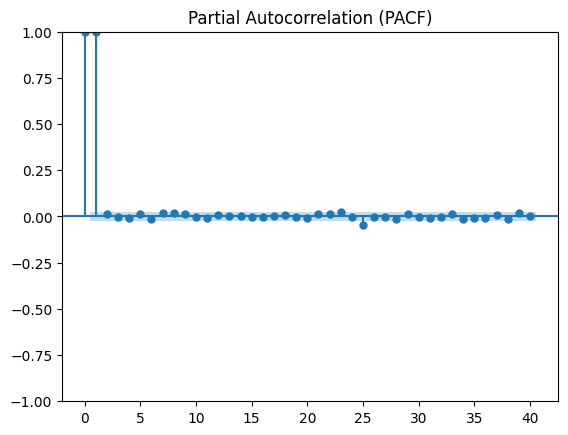

Fitting ARIMA(5,0,2) model...


c:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting\.venv\Lib\site

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 8000
Model:                 ARIMA(5, 0, 2)   Log Likelihood               10014.960
Date:                Fri, 25 Jul 2025   AIC                         -20011.921
Time:                        19:34:02   BIC                         -19949.036
Sample:                             0   HQIC                        -19990.396
                               - 8000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6772      5.106      0.329      0.743      -8.329      11.684
ar.L1         -0.6835      0.058    -11.804      0.000      -0.797      -0.570
ar.L2          0.8507      0.030     28.658      0.0

c:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Vaish\OneDrive\Desktop\internship\TimeSeries_StockForecasting\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


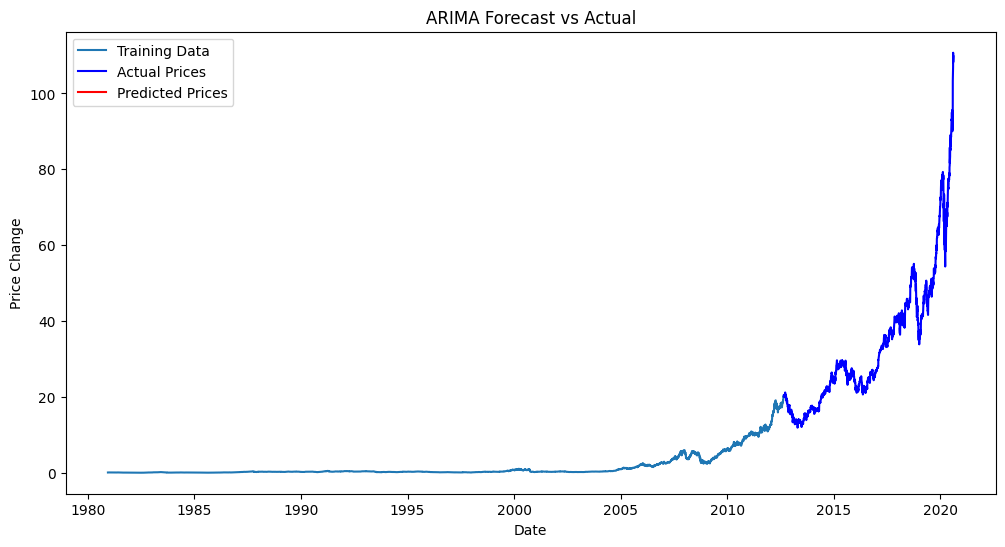

⚠️ Warning: No overlapping data points to calculate RMSE!


In [3]:
# STEP 3: ARIMA MODEL

# ✅ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import os

# ✅ Debug: Show current directory and files
print("Current working directory:", os.getcwd())
print("Files in current directory:", os.listdir())

# ✅ Load dataset
path = "cleaned_aapl_data.csv"  # Adjust if needed
df = pd.read_csv(path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# ✅ Use differenced series if exists
if 'Close_diff' in df.columns:
    series = df['Close_diff']
    print("Using differenced data (Close_diff).")
else:
    series = df['Close']
    print("Using original Close price data.")

# ✅ Split into train and test sets (80% train, 20% test)
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

print(f"Training data size: {len(train)}")
print(f"Test data size: {len(test)}")

# ✅ Plot ACF and PACF to help select p and q
plt.figure(figsize=(12, 5))
plot_acf(train, lags=40)
plt.title('Autocorrelation (ACF)')
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(train, lags=40)
plt.title('Partial Autocorrelation (PACF)')
plt.show()

# 📌 From plots, pick p and q (example: p=5, q=2)
p, d, q = 5, 0, 2  # NOTE: d=0 because data was differenced already

# ✅ Build ARIMA model
print(f"Fitting ARIMA({p},{d},{q}) model...")
model = ARIMA(train, order=(p, d, q))
model_fit = model.fit()

# ✅ Print model summary
print(model_fit.summary())

# ✅ Forecast for test period
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# ✅ Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Prices', color='blue')
plt.plot(forecast, label='Predicted Prices', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend()
plt.show()

# ✅ Ensure forecast length matches test
forecast = forecast[:len(test)]

# ✅ Drop any NaNs from test and forecast
test_clean = test.dropna()
forecast_clean = forecast.dropna()

# ✅ Align indexes (if needed)
common_index = test_clean.index.intersection(forecast_clean.index)
test_final = test_clean.loc[common_index]
forecast_final = forecast_clean.loc[common_index]

# ✅ Check if arrays are not empty
if len(test_final) > 0 and len(forecast_final) > 0:
    # ✅ Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_final, forecast_final))
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
else:
    print("⚠️ Warning: No overlapping data points to calculate RMSE!")
